In [2]:
### --- Libraries --- ###
import numpy as np
import matplotlib.pyplot as plt
import struct 
from scipy.optimize import curve_fit

1\. Write a function that converts numbers among the bin, dec, and hex representations (bin<->dec<->hex)

In [3]:
def converter(x, base_i, base_f):
    '''

    Converts x from initial base_i to final base_f
    Parameters:
        x: string if base_i is hex or bin, integer if base_i is dec
        binary numbers should be in the form 0b.. whereas hex numbers 0x..

        base_i: 'dec', 'hex' or 'bin' initial base
        base_f: 'dec', 'hex' or 'bin' final base
        
    '''

    if base_i != 'dec' and base_i != 'bin' and base_i != 'hex':
        raise ValueError ("Invalid initial base")
    if base_f != 'dec' and base_f != 'bin' and base_f != 'hex':
        raise ValueError ("Invalid final base")
        
    # from binary to decimal 
    if base_i == 'bin':
        n_bin = list(x.strip(" ")) # convert to list, i.e bin(10) = 0b1010 -> ['0', 'b', '1', '0', '1', '0']
        n_bin = [int(n_bin[i]) for i in range(2, len(n_bin))] # indices 0/1 are "0b" -> range starts from 2
        n_bin.reverse() 
        n_dec = 0
        i = 0
        for a in n_bin: 
            n_dec += (2**i) * int(a)
            i += 1 

    # from hexadecimal to decimal (same procedure as before)
    elif base_i == 'hex':
        n_hex = list(x.strip(''))

        for i in range(len(n_hex)):
                if n_hex[i] == 'a': n_hex[i] = 10
                if n_hex[i] == 'b': n_hex[i] = 11
                if n_hex[i] == 'c': n_hex[i] = 12
                if n_hex[i] == 'd': n_hex[i] = 13
                if n_hex[i] == 'e': n_hex[i] = 14
                if n_hex[i] == 'f': n_hex[i] = 15

        n_hex = [int(n_hex[i]) for i in range(2, len(n_hex))]
        n_hex.reverse()
        n_dec = 0
        i = 0
        for a in n_hex:
            n_dec += (16**i) * int(a)
            i += 1 

    # base of initial number is already 10
    else: 
        n_dec = x
    
    if base_f == 'dec':
        return n_dec


    # from decimal to bin 
    if base_f == 'bin':  
        r = []
        q = int(n_dec / 2) 
        r.append(n_dec % 2) 
        while q != 0:
            n_dec = q
            q = int(n_dec / 2)
            r.append(n_dec % 2)
        r.reverse()
        r = ''.join([str(i) for i in r])
    

    elif base_f == 'hex':
        r = []
        q = int(n_dec / 16)     
        r.append(n_dec % 16)      
        while q != 0:
            n_dec = q       
            q = int(n_dec / 16)       
            r.append(n_dec % 16)            
        # Now we have to change numbers from 10 to 16 to a,b,c, etc...
            for i in range(len(r)):
                if r[i] == 10: r[i] = 'a'
                if r[i] == 11: r[i] = 'b'
                if r[i] == 12: r[i] = 'c'
                if r[i] == 13: r[i] = 'd'
                if r[i] == 14: r[i] = 'e'
                if r[i] == 15: r[i] = 'f'

        r.reverse()  
        r = ''.join([str(i) for i in r])  
        
    return r

c = 9999
c_bin = bin(c)
c_hex = hex(c)


print('Using Python functions: initial number is {} in decimal, {} in binary, {} in hexadecimal\n'.format(c,c_bin,c_hex))
print('Using user function:')
print('Converting {} from decimal to binary -> {}'.format(c,converter(c,'dec','bin')))
print('Converting {} from binary to decimal -> {}'.format(c_bin,converter(c_bin,'bin','dec')))
print('Converting {} from decimal to hexadecimal -> {}'.format(c,converter(c,'dec','hex')))
print('Converting {} from hexadecimal to decimal -> {}'.format(c_hex,converter(c_hex,'hex','dec')))
print('Converting {} from hexadecimal to binary -> {}'.format(c_hex,converter(c_hex,'hex','bin')))
print('Converting {} from binary to hexadecimal -> {}'.format(c_bin,converter(c_bin,'bin','hex')))

Using Python functions: initial number is 9999 in decimal, 0b10011100001111 in binary, 0x270f in hexadecimal

Using user function:
Converting 9999 from decimal to binary -> 10011100001111
Converting 0b10011100001111 from binary to decimal -> 9999
Converting 9999 from decimal to hexadecimal -> 270f
Converting 0x270f from hexadecimal to decimal -> 9999
Converting 0x270f from hexadecimal to binary -> 10011100001111
Converting 0b10011100001111 from binary to hexadecimal -> 270f


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent) and check its validity.

In [12]:
def bin_to_float(x): #
    '''
        Parameter x: 32 bit word in a string 
    '''

    if not isinstance(x,str):
        raise ValueError ('Input value is not a string')

    if len(x) != 32:
        raise ValueError ('Number of bins is not 32')


    sign = (-1)**int(x[0],2)
    exp = int(x[1:9], 2)
    man = x[9:]

    s = 0
    for j in range(1,len(man)):
        s += int(man[j-1]) * 2 **(-j)

    n = sign * (1+s)* pow(2, exp - 127)

    return(n)

word1 = "00000011111000000000000000000000"
word2 = "10000001101001001100000000000000"

x = bin_to_float(word1)
y = bin_to_float(word2)

print('First word is {} -> {}'.format(word1,x))
print('Second word is {} -> {}'.format(word2,y))


First word is 00000011111000000000000000000000 -> 1.316553672920962e-36
Second word is 10000001101001001100000000000000 -> -6.051959196811621e-38


In [13]:
# Check if results are consistent using predefined function

def float_to_bin(num):
    bits, = struct.unpack('!I', struct.pack('!f', num))
    return "{:032b}".format(bits)

print(float_to_bin(+1.316553672920962e-36), float_to_bin(+1.316553672920962e-36) == word1)
print(float_to_bin(-6.051959196811621e-38), float_to_bin(-6.051959196811621e-38) == word2)

00000011111000000000000000000000 True
10000001101001001100000000000000 True


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tip**: define two variables initialized to 1 and halve/double them for a sufficient amount of times to exceed the under/over-flow limits  

In [22]:
under = 1. 
over = 1. 
N = 2000
i = 0

while i < N:
    o = over
    over = over * 2
    i += 1 
    if over == float('inf'):
        pos_o = i
        break   
    #print(i,over)

j = 0
while j < N:
    u = under
    under = under / 2
    j += 1
    if under == 0. :
        pos_u = j
        break   
    #print(j,under)


print('Overflow limit reached after ' + str(pos_o) + ' iterations and it is equal to: '+ str(o))
print('Underflow limit reached after ' + str(pos_u) + ' iterations and it is equal to: '+ str(u))


Overflow limit reached after 1024 iterations and it is equal to: 8.98846567431158e+307
Underflow limit reached after 1075 iterations and it is equal to: 5e-324


4\. Write a program to determine the machine precision

**Tip**: define a new variable by adding an increasingly smaller value (in the same way as the previous problem) and check when the addition starts to have no effect on the number

In [16]:
# Addding an increasingly small number to 1
prev_value = 0 
value = 1.0
for i in range(0,20):
    prev_value = value
    value = 1.0 + 10**(-i)
    if prev_value == value:
        pos = i-1
        break
    
print('The precision of the number is not enough to see the small difference after {} iterations, i.e. adding 1e-{} to 1.0'.format(pos,pos))
print('The machine precision is of: ', 10**(-pos))

The precision of the number is not enough to see the small difference after 16 iterations, i.e. adding 1e-16 to 1.0
The machine precision is of:  1e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying the numerator and the denominator by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what has been previously obtained, and why?

(c) write a function that computes the roots of a quadratic equation accurately in all cases

In [17]:
# a)
def standard_sol(a,b,c):

    if (b**2-4*a*c) < 0:
        raise ValueError ('The equation does not have real solutions')

    x1= (-b + np.sqrt(b**2-4*a*c)) / (2*a)
    x2= (-b - np.sqrt(b**2-4*a*c)) / (2*a)

    return x1, x2

# b)
def sol_2(a,b,c):  

    if (b**2-4*a*c) < 0:
        raise ValueError ('The equation does not have real solutions')

    x1 = (2*c) / (-b - np.sqrt(b**2-4*a*c))
    x2 = (2*c) / (-b + np.sqrt(b**2-4*a*c))

    return x1, x2
    
# c)
def stable_sol(a,b,c):

    if (b**2-4*a*c) < 0:
        raise ValueError ('The equation does not have real solutions')
    
    x1 = (2*c) / (-b - np.sqrt(b**2-4*a*c))
    x2 = (-b - np.sqrt(b**2-4*a*c)) / (2*a)
    
    return x1, x2


print('Standard formula:', standard_sol(0.001,1000,0.001))
print('Alternative formula:', sol_2(0.001,1000,0.001))
print('Stable formula:', stable_sol(0.001,1000,0.001))


Standard formula: (-9.999894245993346e-07, -999999.999999)
Alternative formula: (-1.000000000001e-06, -1000010.5755125057)
Stable formula: (-1.000000000001e-06, -999999.999999)


*b) We assume $x_1,x_2$ to be the solutions with signs + and - respectively. Using the second formula $x_1$ is computed exactly, instead the result for $x_2$ is  worst than the one obtained with the first function. This is due to the fact that, using $x_1 =\frac{-b+\sqrt{b^2-4ac}}{2a}$ and $x_2 =\frac{2c}{-b+\sqrt{b^2-4ac}}$, we are getting roundoff errors ( in the second formula in the numerator we are subtracting two nearly equal numbers, i.e. b >> a,c ). Thus, the best solution is using the first formula for $x_2$ and the second for $x_1$.*


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare it with the answer your program gives. The two will not agree perfectly. Why?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

In [38]:
# a)
def f(x):
    return x * (x-1)


def der(f, x0, delta):
    return ( f(x0 + delta) - f(x0) ) / delta


def real_der(x0):
    return 2 * x0 - 1


print('Derivative @ x = 1  calculated with program: ',der(f, 1.0, 1e-02))
print('Derivative @ x = 1 calculated analytically: ',real_der(1.0))


Derivative @ x = 1  calculated with program:  1.010000000000001
Derivative @ x = 1 calculated analytically:  1.0


*a) The definition of the derivative is accurate for values of $\delta$ approaching to zero. In this case $\delta$ is fairly big, and this results in the discrepance with the analytical solution.*

Delta | Calculated value of x | Accuracy [%]
0.1 | 1.100000000000001 | 10.000000000000098
0.01 | 1.010000000000001 | 1.0000000000000897
0.001 | 1.0009999999998895 | 0.09999999998895337
0.0001 | 1.0000999999998899 | 0.009999999988985486
1e-05 | 1.0000100000065513 | 0.0010000006551269536
1e-06 | 1.0000009999177333 | 9.99917733279787e-05
1e-07 | 1.0000001005838672 | 1.005838672352155e-05
1e-08 | 1.0000000039225287 | 3.9225287462585356e-07
1e-09 | 1.000000083740371 | 8.374037108183074e-06
1e-10 | 1.000000082840371 | 8.284037100736441e-06
1e-11 | 1.000000082750371 | 8.275037099991778e-06
1e-12 | 1.0000889005833413 | 0.008890058334132256
1e-13 | 0.9992007221627407 | 0.07992778372593046
1e-14 | 0.9992007221626509 | 0.07992778373491216
1e-15 | 1.1102230246251577 | 11.022302462515764


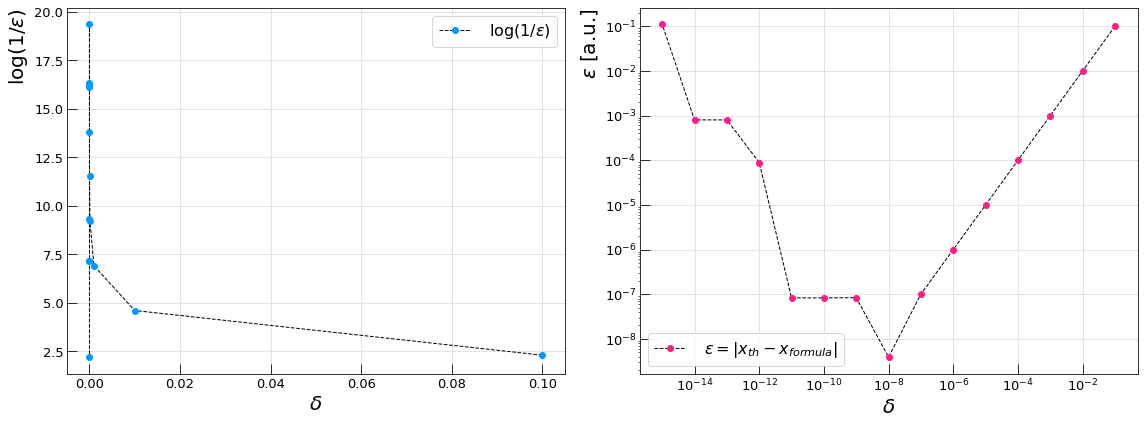

In [40]:
# b)
deltas = [ 10**(-i) for i in range(1,16) ]
x_th = real_der(1) 
x_exp = [ der(f, 1, n) for n in deltas ]
acc = [ np.abs(x_th - a) for a in x_exp ]
acc_log = [ np.log(1/i) for i in acc ]

print('Delta', '| Calculated value of x', '| Accuracy [%]')
for i in range(len(deltas)):
    print(deltas[i],'|',x_exp[i],'|', acc[i]*100)

# Plot settings
fig,((ax,ax2)) = plt.subplots(1,2,figsize=(16,6))

ax.plot(deltas,acc_log, marker = 'o',markersize=6,markerfacecolor = '#009AFF',markeredgecolor = '#009AFF', color = 'black', linewidth=1,ls = 'dashed', label = ' log(1/$\epsilon$)')
ax.set_ylabel('log(1/$\epsilon$)', fontsize = 20, loc = 'top')

ax2.plot(deltas,acc, marker = 'o',markersize=6,markerfacecolor = '#FF1F85',markeredgecolor = '#FF1F85', color = 'black', linewidth=1,ls = 'dashed', label = ' $\epsilon = | x_{th} - x_{formula} |$')
ax2.set_ylabel('$\epsilon$ [a.u.]', fontsize = 20, loc = 'top')
ax2.set_xscale('log')
ax2.set_yscale('log')

for ax in fig.get_axes():
    ax.set_xlabel('$\delta$', fontsize = 20, loc = 'center')
    ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10,labelsize = 13)
    ax.grid( linestyle = '--', linewidth = 0.5)
    ax.legend(loc = 'best', prop = {'size': 16}, ncol = 1)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15)
plt.show()



*b) The two derivatives do not agree perfectly due to the discretization of $\delta$. We can observe an increasing accuracy as $\delta$ becomes smaller, yet just up to 1e-08. Indeed, for smaller values of $\delta$ the function $\frac{f(x+\delta)-f(x)}{\delta}$ becomes poorly conditioned,so we have big effects in the output for small input perturbation.*


7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt{(1-x^2)} {\rm d}x
$$
which is known to be $I=\frac{\pi}{2}=1.57079632679...$.

Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a program to compute the integral with $N=100$. How does the result compare to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [26]:
def f(x):
    return np.sqrt(abs(1-x**2))

def Riemann_int(N, h, x_i):
    '''
        Parameters: 
        N = Number of points in the grid
        h = grid spacing
        x_i = intergration starting point 

    '''
    somma = 0
    x = x_i
    for k in range(1, N+1):
        somma += h * f(x)
        x += h
    return somma
 
N = 100
h = 2/N
x_0 = -1

result = Riemann_int(N, h, x_0)
print('Riemann integral: ', result, '\nAccuracy: ', abs(result - np.pi/2)/(np.pi/2)*100, '%')




Riemann integral:  1.5691342555492493 
Accuracy:  0.10581074180626304 %


In [9]:
# Using the built-in function %time to calculate the execution time of a function

%timeit Riemann_int(N, h, x_0)
%timeit Riemann_int(2*N, h, x_0)
%timeit Riemann_int(N**2, h, x_0)
%timeit Riemann_int(N**3, h, x_0)
%timeit Riemann_int(2*N**3, h, x_0)


110 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
217 µs ± 4.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
10.7 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.09 s ± 5.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.15 s ± 6.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


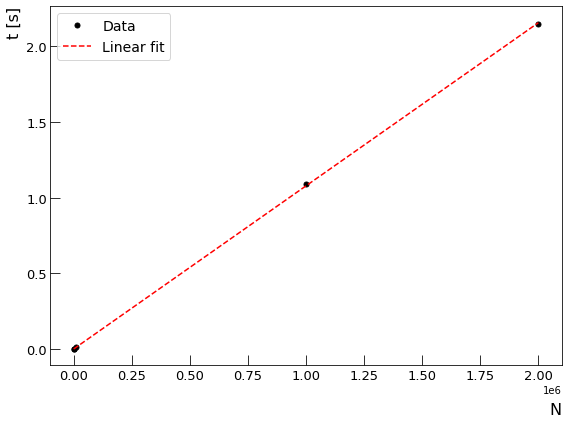

In [41]:
# Assuming that N is approximately linear in function of time we perform a linear 
# fit to predict the value of N that corresponds to an execution time of 60 s

def linfit(x, a, b):
    '''
        Function that performs linear fit
    '''
    return a + b * np.array(x)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

x = [N, 2*N , N**2 , N**3, 2*N**3]
y = [110.*1e-06, 217.*1e-06, 10.7*1e-03, 1.09, 2.15]
erry = [1.06*1e-06, 4.02*1e-06,126*1e-06, 5.65*1e-03,  6.5*1e-03]

par, cov = curve_fit(f = linfit, xdata = x, ydata = y, sigma = erry)

ax.plot(x,y, marker = 'o',markersize=5,markerfacecolor = 'black',markeredgecolor = 'black',lw = 0, label = 'Data')
ax.plot(x, linfit(x, *par), color = 'red', linewidth = 1.5, linestyle='dashed', label = 'Linear fit')
ax.set_xlabel('N', fontsize = 16, loc = 'right', labelpad = 20)
ax.set_ylabel('t [s]', fontsize = 16, loc = 'top')
ax.legend(loc = 'best', prop = {'size': 14}, ncol = 1)
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10,labelsize = 13)

fig.tight_layout()
plt.show()

In [42]:
# Get fit parameters
b = par[1]
a = par[0]

x1 = (1 - a)/ b
x60 = (60 - a)/ b

print('maximum N for computational time under 1 s:',x1)
print('maximum N for computational time under 60 s:',x60)

maximum N for computational time under 1 s: 927409.2886918102
maximum N for computational time under 60 s: 55644672.98388385
